In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_orig = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
df_orig.head()

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False


In [33]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 759
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  497166 non-null  object 
 1   feat_A               497166 non-null  bool   
 2   feat_C               497166 non-null  bool   
 3   feat_D               497166 non-null  bool   
 4   feat_E               497166 non-null  bool   
 5   feat_F               497166 non-null  bool   
 6   feat_G               497166 non-null  bool   
 7   feat_H               497166 non-null  bool   
 8   feat_I               497166 non-null  bool   
 9   feat_K               497166 non-null  bool   
 10  feat_L               497166 non-null  bool   
 11  feat_M               497166 non-null  bool   
 12  feat_N               497166 non-null  bool   
 13  feat_P               497166 non-null  bool   
 14  feat_Q               497166 non-null  bool   
 15  feat_R              

In [34]:
df_orig.describe()

,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry_index
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,4.971660e+05,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,-1.162007,0.780075,-0.108342,1.854782,16.746550,5.209644e+01,75.733749,-1.789849,-1.160675,1.754382,-1.140480,-0.053135,-0.177757,0.128386,-0.201625,-3.927826,1.956133,-1.099622,535.495128
std,1.039634,1.520499,1.833996,0.469940,18.494097,4.792873e+01,26.971019,58.176800,1.058466,60.429611,1.062049,57.906105,0.156652,61.219479,0.232904,25.770530,20.641283,26.637590,665.740408
min,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-2.842171e-14,0.000000,-2281.000000,-4.000000,-2281.000000,-4.000000,-2280.000000,-1.800000,-2281.000000,-2.900000,-149.393997,-114.931000,-152.839005,0.000000
25%,-1.686451,-0.654101,-2.067246,1.590771,1.239801,5.274057e+00,55.360000,-4.000000,-2.200000,-1.000000,-2.200000,-2.000000,-0.200000,-2.000000,-0.200000,-18.850000,-9.518750,-16.964001,172.000000
50%,-1.199133,0.241335,0.775206,1.756220,8.788650,4.352778e+01,89.530000,-2.000000,-0.700000,2.000000,-0.600000,1.000000,-0.200000,-1.000000,-0.200000,-2.881000,1.206000,-0.681000,365.000000
75%,-1.047934,2.297116,0.966645,2.122055,29.958422,8.623462e+01,95.960000,0.000000,-0.200000,4.000000,-0.200000,2.000000,-0.100000,2.000000,-0.100000,11.469000,13.148000,14.147000,667.000000
max,3.141575,3.141584,3.141568,3.137176,99.338342,2.200520e+02,98.980000,2281.000000,0.000000,2281.000000,0.000000,2281.000000,0.000000,2282.000000,0.000000,162.250000,103.135002,176.059998,7384.000000


### Handling missing values (annotation_atomrec)

In [35]:
# annotation_atomrec has missing values, as observed by info() above
df_orig['annotation_atomrec'].isnull().sum()

12689

In [36]:
df_orig['annotation_atomrec'].value_counts()

L    46400
S    37097
E    35264
A    33142
G    31770
V    30421
K    30146
P    27619
R    26959
T    25121
D    24806
I    23458
Q    21991
N    18717
F    17994
Y    14039
H    12048
M    11449
C    10209
W     5827
Name: annotation_atomrec, dtype: int64

In [37]:
# unless the value is Nan, annotation_sequene = annotation_atomrec
df_orig.loc[df_orig['annotation_sequence'] != df_orig['annotation_atomrec']]['annotation_atomrec']

1397    NaN
1398    NaN
1399    NaN
1400    NaN
1401    NaN
       ... 
3677    NaN
3678    NaN
3679    NaN
3680    NaN
3681    NaN
Name: annotation_atomrec, Length: 12689, dtype: object

In [45]:
# need to find how exactly this column is different from annotation_sequence, but ignore this for now
#  - may be related to annotation_sequence AND xyz coordinates?
df_train = df_orig.drop('annotation_atomrec', axis=1)
df_train.head()

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False


### Dropping unnecessary (?) columns

In [46]:
# feat_[letter] is one-hot encoded version of annotation_sequence
df_train = df_train.drop(df_train.iloc[:, 1:21], axis=1)
df_train

,annotation_sequence,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_H,feat_DSSP_B,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,0.000000,2.257610,-2.375020,1.956201,80.020602,137.023818,38.49,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742000,-35.189999,GEMI5_HUMAN,0,False
1,G,-1.100680,2.224168,-2.654037,1.900792,69.542382,0.000000,46.08,False,False,...,0,0.0,0,0.0,-25.158001,-1.342000,-34.104000,GEMI5_HUMAN,1,False
2,Q,-1.295398,2.676551,-1.696727,2.458310,23.387401,88.587659,65.42,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641000,-32.175999,GEMI5_HUMAN,2,False
3,E,-2.352796,2.665542,-2.810012,2.054226,4.908812,44.521273,85.17,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654000,-29.171000,GEMI5_HUMAN,3,False
4,P,-1.134474,2.612150,-2.754863,2.272191,9.742674,52.613700,93.24,False,False,...,0,0.0,705,-0.2,-19.783001,2.670000,-26.858999,GEMI5_HUMAN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,S,-2.378927,2.608671,-2.290233,2.192222,7.313673,48.994428,95.81,False,False,...,-3,-0.1,2,-0.4,-19.742001,20.796000,-12.319000,AOC3_HUMAN,755,False
756,H,-2.122860,2.441583,-2.331874,1.570277,20.300374,46.103273,96.62,False,False,...,-358,-0.1,-330,-0.1,-16.299000,19.153999,-12.640000,AOC3_HUMAN,756,False
757,G,-1.124856,-0.248235,-1.292085,2.315429,2.763823,0.000000,93.61,False,False,...,-360,-0.2,-1,-0.1,-13.404000,19.502001,-10.121000,AOC3_HUMAN,757,False
758,G,1.651085,-2.916255,-0.280431,2.332004,15.092203,0.000000,93.17,False,False,...,0,0.0,0,0.0,-10.986000,20.320000,-13.016000,AOC3_HUMAN,758,False


In [ ]:
# feat_SCSASA has negative values (which it should not as surface area), but ignore this for now
#   since we will be scaling the value

## Visualization

array([[<AxesSubplot:title={'center':'feat_PHI'}>,
        <AxesSubplot:title={'center':'feat_PSI'}>,
        <AxesSubplot:title={'center':'feat_TAU'}>,
        <AxesSubplot:title={'center':'feat_THETA'}>],
       [<AxesSubplot:title={'center':'feat_BBSASA'}>,
        <AxesSubplot:title={'center':'feat_SCSASA'}>,
        <AxesSubplot:title={'center':'feat_pLDDT'}>,
        <AxesSubplot:title={'center':'feat_DSSP_6'}>],
       [<AxesSubplot:title={'center':'feat_DSSP_7'}>,
        <AxesSubplot:title={'center':'feat_DSSP_8'}>,
        <AxesSubplot:title={'center':'feat_DSSP_9'}>,
        <AxesSubplot:title={'center':'feat_DSSP_10'}>],
       [<AxesSubplot:title={'center':'feat_DSSP_11'}>,
        <AxesSubplot:title={'center':'feat_DSSP_12'}>,
        <AxesSubplot:title={'center':'feat_DSSP_13'}>,
        <AxesSubplot:title={'center':'coord_X'}>],
       [<AxesSubplot:title={'center':'coord_Y'}>,
        <AxesSubplot:title={'center':'coord_Z'}>,
        <AxesSubplot:title={'center':'entry

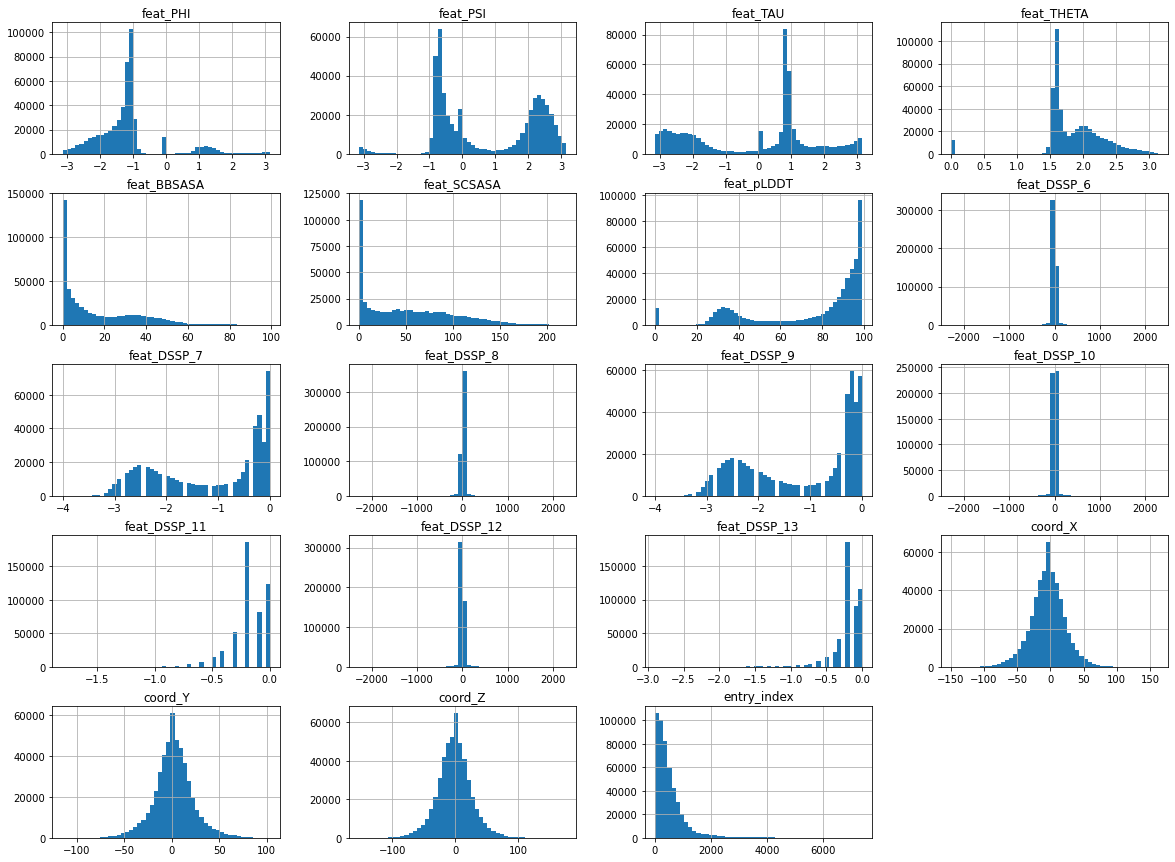

In [47]:
df_train.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='annotation_sequence', ylabel='count'>

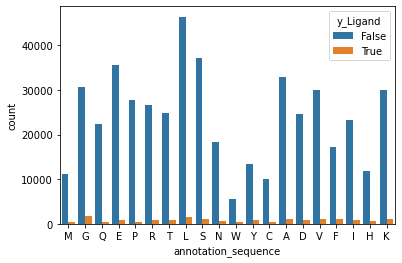

In [51]:
sns.countplot(x='annotation_sequence',hue='y_Ligand',data=df_train)

AttributeError: 'Rectangle' object has no property 'col'

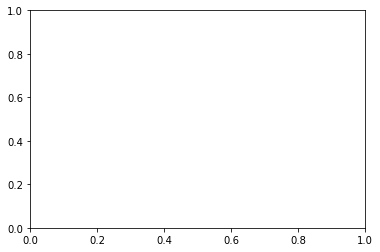

In [53]:
g = sns.countplot(data=df_train, x='annotation_sequence', col='y_Ligand')
# g.map(sns.coun, 'tip')